**L076_mean_shift.ipynb**

2024 JUN 11

Tershire

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, Y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

# model

In [4]:
from sklearn.cluster import MeanShift

## model1: training & result

In [5]:
mean_shift = MeanShift(bandwidth=0.9)

In [6]:
cluster_ids = mean_shift.fit_predict(X)

In [7]:
print("unique cluster IDs:", np.unique(cluster_ids))

unique cluster IDs: [0 1 2 3 4 5 6 7]


## model2: training & result

In [8]:
mean_shift = MeanShift(bandwidth=1.0)

In [9]:
cluster_ids = mean_shift.fit_predict(X)

In [10]:
print("unique cluster IDs:", np.unique(cluster_ids))

unique cluster IDs: [0 1 2]


## model3: training & result (optimal bandwidth)

In [16]:
from sklearn.cluster import estimate_bandwidth

In [17]:
optimal_bandwidth = estimate_bandwidth(X, quantile=0.25)
print(f"optimal_bandwidth: {optimal_bandwidth:.3F}")

optimal_bandwidth: 1.689


In [18]:
mean_shift = MeanShift(bandwidth=optimal_bandwidth)

In [19]:
cluster_ids = mean_shift.fit_predict(X)

In [20]:
print("unique cluster IDs:", np.unique(cluster_ids))

unique cluster IDs: [0 1 2]


# data: pandas

In [21]:
dataset_df = pd.DataFrame(data=X, columns=["feature1", "feature2"])
dataset_df["target"] = Y

# model

In [23]:
# optimal bandwidth
optimal_bandwidth = estimate_bandwidth(X, quantile=0.25)

In [24]:
mean_shift = MeanShift(bandwidth=optimal_bandwidth)

# training

In [25]:
cluster_ids = mean_shift.fit_predict(X)

# training result

In [27]:
dataset_df["cluster_id"] = cluster_ids

In [30]:
cluster_centers = mean_shift.cluster_centers_
unique_cluster_ids = np.unique(cluster_ids)

In [31]:
clustering_result = dataset_df.groupby(["target", "cluster_id"])["feature1"].count()
print(clustering_result)

target  cluster_id
0       0             67
1       2             67
2       1             65
        2              1
Name: feature1, dtype: int64


In [33]:
clustering_result = dataset_df.groupby("target")["cluster_id"].value_counts()
print(clustering_result)

target  cluster_id
0       0             67
1       2             67
2       1             65
        2              1
Name: count, dtype: int64


## visualization

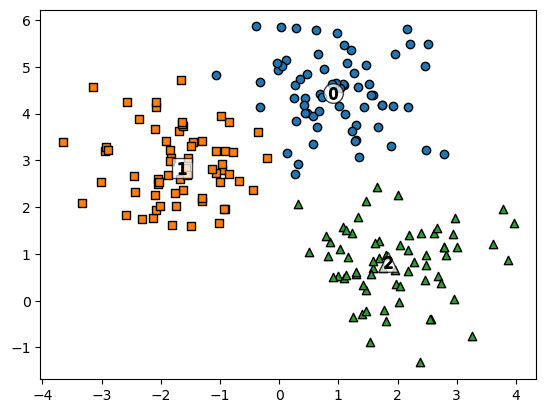

In [32]:
markers = ['o', 's', '^']
for cluster_id in unique_cluster_ids:
    cluster = dataset_df[dataset_df["cluster_id"]==cluster_id]
    plt.scatter(x=cluster["feature1"], y=cluster["feature2"],
                edgecolors='k', marker=markers[cluster_id])

for i, cluster_center in enumerate(cluster_centers):
    # shape
    plt.scatter(x=cluster_center[0], y=cluster_center[1],
                s=200, color="white", alpha=0.75,
                edgecolors='k', marker=markers[i])
    # text
    plt.scatter(x=cluster_center[0], y=cluster_center[1],
                s=70, color='k',
                edgecolors='k', marker="$%d$" % i)

plt.show()